# Image and Label Preprocessing

In [1]:
import pandas as pd

label_data_dir = "raw_galaxy_data/gz2_hart16.csv" #read label data
image_mapping_dir = "raw_galaxy_data/gz2_filename_mapping.csv" #read image to label mappings
image_folder = "raw_galaxy_data/original_images" #file of original images

labels = pd.read_csv(label_data_dir)
image_mappings = pd.read_csv(image_mapping_dir)

In [2]:
#drop unnecessary columns - mainly votes and location in sky data
labels = labels.rename(columns={"dr7objid":"objid"})
labels = labels.drop(columns=labels.columns[7:231])
labels = labels.drop(columns=labels.columns[1:5])
labels

,objid,sample,gz2_class
0,587732591714893851,original,Sc+t
1,588009368545984617,original,Sb+t
2,587732484359913515,original,Ei
3,587741723357282317,original,Sc+t
4,587738410866966577,original,Er
...,...,...,...
239690,587741490371625059,extra,Ec
239691,587731174917669027,stripe82,Ei(i)
239692,587731512070177108,stripe82,Ei
239693,587731513145688256,stripe82,Ei(i)


In [3]:
#get labels for the different classes
labels["gz2_class"].value_counts()

gz2_class
Ei          44038
Er          36764
Ser         14009
Sc?t        13509
Ec          10149
            ...  
SBc4t(u)        1
SBc+l(m)        1
Sa?l(i)         1
SBd+m(i)        1
Sd3m(o)         1
Name: count, Length: 818, dtype: int64

In [4]:
#look at what's contained in the image mapping csv
image_mappings

,objid,sample,asset_id
0,587722981736120347,original,1
1,587722981736579107,original,2
2,587722981741363294,original,3
3,587722981741363323,original,4
4,587722981741559888,original,5
...,...,...,...
355985,8647475122541625731,stripe82_coadd_2,355986
355986,8647475122541625762,stripe82_coadd_2,355987
355987,8647475122541625774,stripe82_coadd_2,355988
355988,8647475122761762019,stripe82_coadd_2,355989


In [5]:
#merge labels and mappings 
labels_mappings_combined = pd.merge(image_mappings, labels, on="objid", how="inner")
labels_mappings_combined

,objid,sample_x,asset_id,sample_y,gz2_class
0,587722981741363294,original,3,original,Sb
1,587722981741363323,original,4,original,Sc?l
2,587722981741559888,original,5,original,Er
3,587722981741625481,original,6,original,Sc1t
4,587722981741625484,original,7,original,Sb
...,...,...,...,...,...
239690,588015510368681992,stripe82,295294,stripe82,SBc4m
239691,588015510368682105,stripe82,295295,stripe82,Er
239692,588015510368682132,stripe82,295296,stripe82,Ec
239693,588015510636265643,stripe82,295304,stripe82,Sc?l


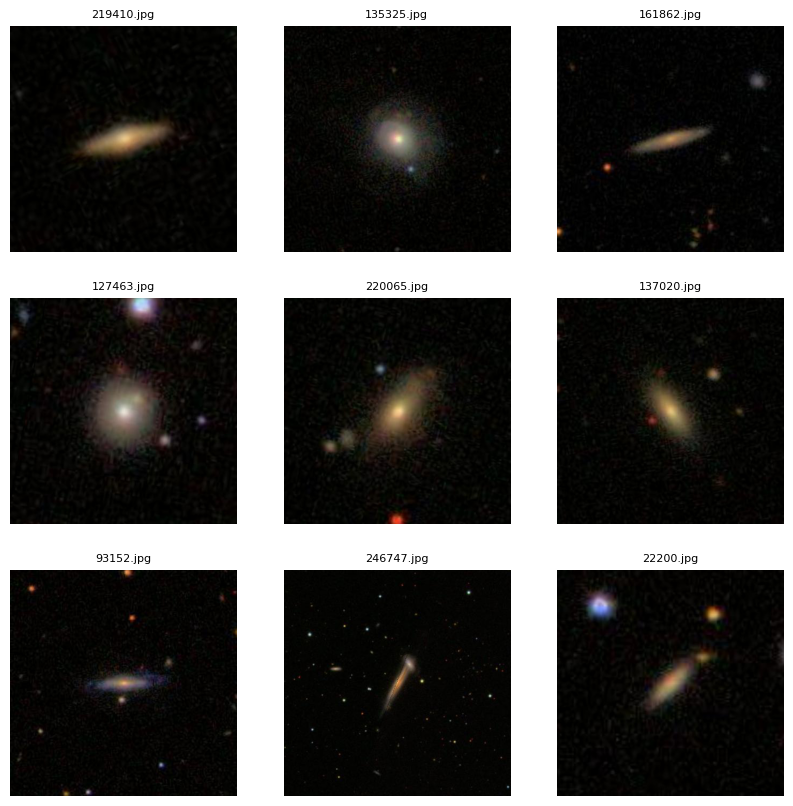

In [7]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import os

#visualize 9 random images
image_folder = "raw_galaxy_data/original_images"

image_files = os.listdir(image_folder)

sample_images = random.sample(image_files, 9)

fig, axes = plt.subplots(3, 3, figsize=(10, 10))

for i, ax in enumerate(axes.flat):
    image_path = os.path.join(image_folder, sample_images[i])
    img = mpimg.imread(image_path)
    ax.imshow(img)
    ax.set_title(sample_images[i], fontsize=8)
    ax.axis('off') 

plt.show()

In [8]:
#cut out center of image and grayscale and scale down to 50x50 - DO NOT RERUN UNLESS REPROCESSING IMAGES
from PIL import Image
import numpy as np

image_folder = "raw_galaxy_data/original_images"

processed_folder = "processed_galaxy_data/processed_images"
os.makedirs(processed_folder, exist_ok=True)

#dimensions of center to cut out 
flatten_width = 200
flatten_height = 200

#for each image in folder
for imagename in os.listdir(image_folder):
    image_path = os.path.join(image_folder, imagename)
    image = Image.open(image_path)

    width, height = image.size

    #calculate coordinates of place to crop out 
    left = (width - flatten_width) // 2
    top = (height - flatten_height) // 2
    right = left + flatten_width
    bottom = top + flatten_height

    #crop out center 200x200
    center = image.crop((left, top, right, bottom))

    #convert to grayscale
    center_grayscale = center.convert("L")
    
    #scale images down to 50x50
    resized_center_grayscale = center_grayscale.resize((50, 50))
    
    #save to output path
    output_path = os.path.join(processed_folder, imagename.split('.')[0] + '.jpg')
    resized_center_grayscale.save(output_path)

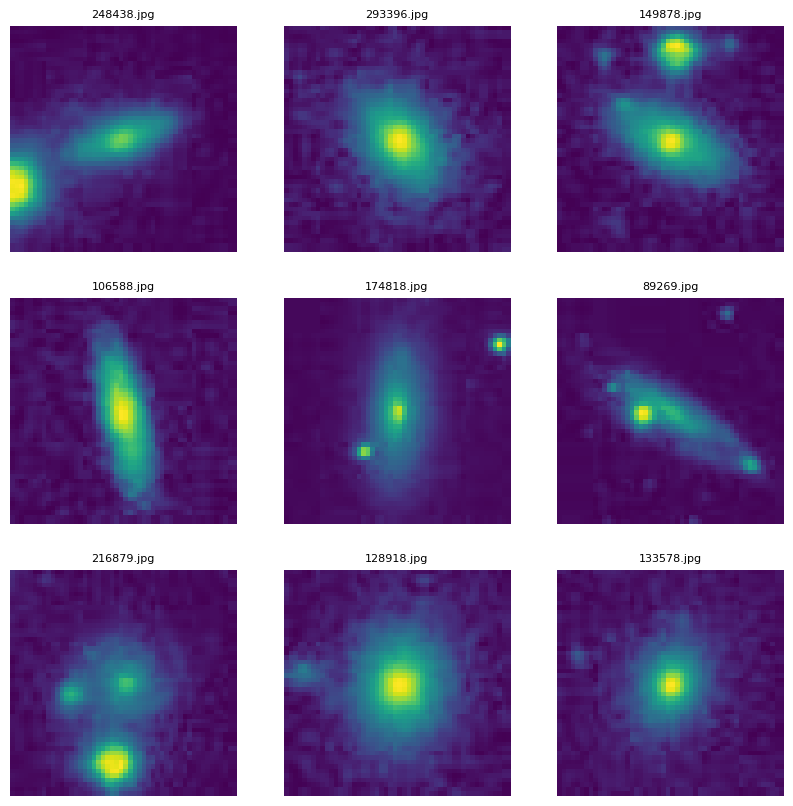

In [24]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import os

#visualize 9 random images
image_folder = "processed_galaxy_data/processed_images"

image_files = os.listdir(image_folder)

sample_images = random.sample(image_files, 9)

fig, axes = plt.subplots(3, 3, figsize=(10, 10))

for i, ax in enumerate(axes.flat):
    image_path = os.path.join(image_folder, sample_images[i])
    img = mpimg.imread(image_path)
    ax.imshow(img)
    ax.set_title(sample_images[i], fontsize=8)
    ax.axis('off') 

plt.show()

In [9]:
#Check which labels correspond with an image
image_folder = "processed_galaxy_data/processed_images"

def check_image(image_id):
    filepath = os.path.join(image_folder, str(image_id) + ".jpg")
    return os.path.exists(filepath)

labels_mappings_filtered = labels_mappings_combined[labels_mappings_combined['asset_id'].apply(check_image)]

In [10]:
#extract shape label data
labels_mappings_filtered['shape_label'] = labels_mappings_filtered['gz2_class'].str.extract(r'([A-Z]{1,2})')

#drop unnecessary rows 
labels_mappings_filtered = labels_mappings_filtered.drop(columns=['sample_x', 'sample_y', 'gz2_class'])

C:\Users\tianr\AppData\Local\Temp\ipykernel_35944\3687393480.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  labels_mappings_filtered['shape_label'] = labels_mappings_filtered['gz2_class'].str.extract(r'([A-Z]{1,2})')


In [11]:
labels_mappings_filtered.to_csv('processed_galaxy_data/labels_mappings_filtered.csv', index = False) 

In [12]:
labels_mappings_filtered

,objid,asset_id,shape_label
0,587722981741363294,3,S
1,587722981741363323,4,S
2,587722981741559888,5,E
3,587722981741625481,6,S
4,587722981741625484,7,S
...,...,...,...
239690,588015510368681992,295294,SB
239691,588015510368682105,295295,E
239692,588015510368682132,295296,E
239693,588015510636265643,295304,S


In [14]:
#flatten image
flattened_data = []

for imagename in os.listdir(processed_images_folder):
    image = mpimg.imread(os.path.join(processed_images_folder, imagename))
    flattened_image = image.flatten() 
    flattened_data.append(flattened_image)

In [15]:
labels

,objid,asset_id,shape_label
0,587722981741363294,3,S
1,587722981741363323,4,S
2,587722981741559888,5,E
3,587722981741625481,6,S
4,587722981741625484,7,S
...,...,...,...
239568,588015510368681992,295294,SB
239569,588015510368682105,295295,E
239570,588015510368682132,295296,E
239571,588015510636265643,295304,S


In [16]:
#convert to numpy array
normalized = np.array(flattened_data)

In [17]:
#normalize to a scale of 0 to 1
normalized/255.0

array([[0.02745098, 0.01960784, 0.01568627, ..., 0.01568627, 0.00784314,
        0.00784314],
       [0.04313725, 0.02745098, 0.01176471, ..., 0.        , 0.01568627,
        0.01568627],
       [0.1372549 , 0.05882353, 0.00392157, ..., 0.12156863, 0.09411765,
        0.09411765],
       ...,
       [0.02745098, 0.04705882, 0.03921569, ..., 0.02745098, 0.03137255,
        0.03137255],
       [0.        , 0.        , 0.01960784, ..., 0.04705882, 0.02352941,
        0.01568627],
       [0.05098039, 0.05098039, 0.04313725, ..., 0.03921569, 0.04705882,
        0.04313725]])

In [18]:
normalized

array([[ 7,  5,  4, ...,  4,  2,  2],
       [11,  7,  3, ...,  0,  4,  4],
       [35, 15,  1, ..., 31, 24, 24],
       ...,
       [ 7, 12, 10, ...,  7,  8,  8],
       [ 0,  0,  5, ..., 12,  6,  4],
       [13, 13, 11, ..., 10, 12, 11]], dtype=uint8)

In [19]:
#save as csv 
np.savetxt('processed_galaxy_data/flattened_normalized_images.csv', normalized, delimiter=',')

# Dimensionality Reduction

## PCA

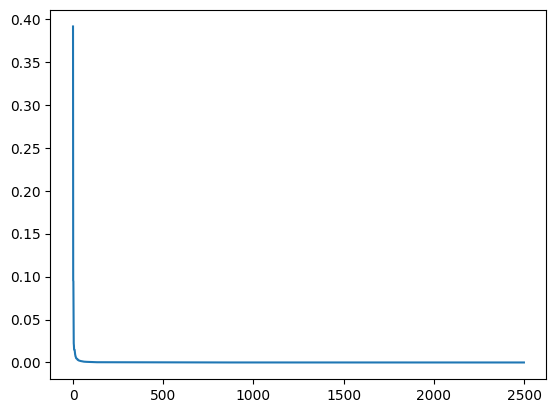

In [20]:
from sklearn.decomposition import PCA

flattened_image_dir= "processed_galaxy_data/flattened_normalized_images.csv"

#load flattened images
flattened_data = pd.read_csv(flattened_image_dir)

#PCA and look for an elbow
pca = PCA()

fitted_pca = pca.fit_transform(flattened_data)
    
plt.plot(pca.explained_variance_ratio_);  

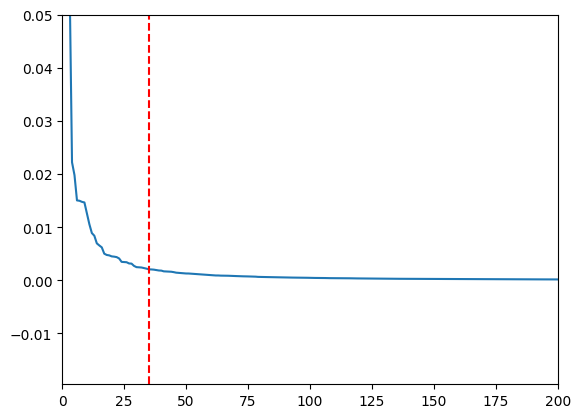

In [21]:
#zoom in on the elbow and define a cutoff point - in this case it looks like the elbow ends at pc35 
plt.plot(pca.explained_variance_ratio_);
plt.xlim(left = 0, right=200);
plt.ylim(top=0.05);
plt.axvline(x=35, color='r', linestyle='--')

In [22]:
#refit pca, this time with n_components = 35
pca = PCA(n_components=35)

fitted_pca = pca.fit_transform(flattened_data)

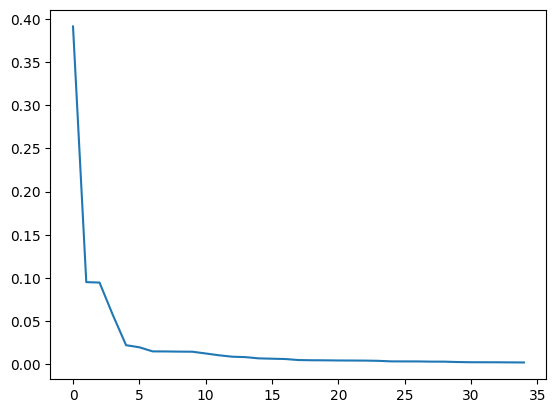

In [23]:
plt.plot(pca.explained_variance_ratio_); 